In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Input dataset : https://www.kaggle.com/wenruliu/adult-income-dataset/version/2
df = pd.read_csv('E:/steerwise/adult-income-usa/adult-income-usa.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Replacing '?' with Nan
df = df.replace('?',np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


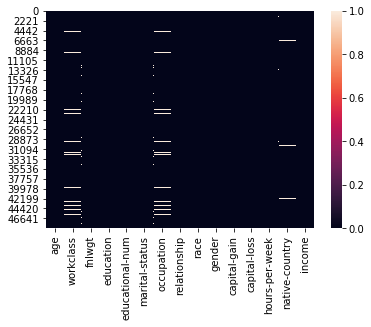

In [5]:
# Checking for null field values
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
# Nan values are available in the fields - workclass, occupation and native-country.  Let us remove all rows containing null/Nan values
df.dropna(axis=0, inplace=True)

In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

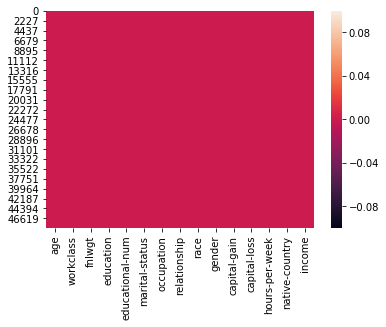

In [9]:
# Rows containing Nan values are removed
sns.heatmap(df.isnull())

In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
# Imputing numerical value to the field workclass
# Field containing 'gov' will be given value as 1 and others as 0
workclass = df['workclass'].transform(lambda x : 1 if 'gov' in x else 0)

In [14]:
# imputing numerical value to the field marital-status
# Field containing 'Married-' are given as value 1 and others as 0
marital = df['marital-status'].transform(lambda x : 1 if 'Married-' in x else 0)

In [15]:
# Imputing numerical value to the field race
# Field containing 'White' will be given value as 1 and others as 0
race = df['race'].transform(lambda x : 1 if x == 'White' else 0)

In [16]:
# Imputing numerical value to the field gender
# Field containing 'Male' will be given value as 1 and female as 0
gender = pd.get_dummies(df['gender'], drop_first=True)

In [18]:
# Imputing numerical value to the field native-country
# Field containing 'United-States' will be given value as 1 and others as 0
native = df['native-country'].transform(lambda x : 1 if 'United-States' in x else 0)

In [19]:
# Imputing numerical value to the field income
# Field containing '>50K' will be given value as 1 and <=50K as 0
income = pd.get_dummies(df['income'], drop_first=True)

In [20]:
# Removing fields which are not needed to calculate logistic regression
df.drop(['education', 'occupation', 'relationship'], axis=1, inplace=True)

In [21]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,White,Male,0,0,30,United-States,<=50K


In [22]:
# Replacing the fields workclass, marital-status, race, gender, native-country and income with the imputed field values
df.drop(['workclass', 'marital-status', 'race', 'gender', 'native-country', 'income'], axis=1, inplace=True)
df_concatenated = pd.concat([workclass, marital, race, gender, native, income], axis=1)
df_final = pd.concat([df, df_concatenated], axis=1)
df_final.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,race,Male,native-country,>50K
0,25,226802,7,0,0,40,0,0,0,1,1,0
1,38,89814,9,0,0,50,0,1,1,1,1,0
2,28,336951,12,0,0,40,1,1,1,1,1,1
3,44,160323,10,7688,0,40,0,1,0,1,1,1
5,34,198693,6,0,0,30,0,0,1,1,1,0


In [23]:
# Writing the cleaned data to an output csv file
df_final.to_csv('E:/steerwise/adult-income-usa/adult-income-usa-cleaned.csv')